<a href="https://colab.research.google.com/github/lucasjsbarbosa/clusterizacao-de-clientes-para-estrategia-de-marketing/blob/main/clusteriza%C3%A7%C3%A3o_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Marketing_data.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.loc[pd.isnull(df['CREDIT_LIMIT'])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [10]:
df.loc[pd.isnull(df['MINIMUM_PAYMENTS'])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [11]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'] == 0, inplace=True)

In [12]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [13]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
df.shape

(8950, 18)

In [15]:
df.drop('CUST_ID', axis=1, inplace=True)

## Visualização dos Dados

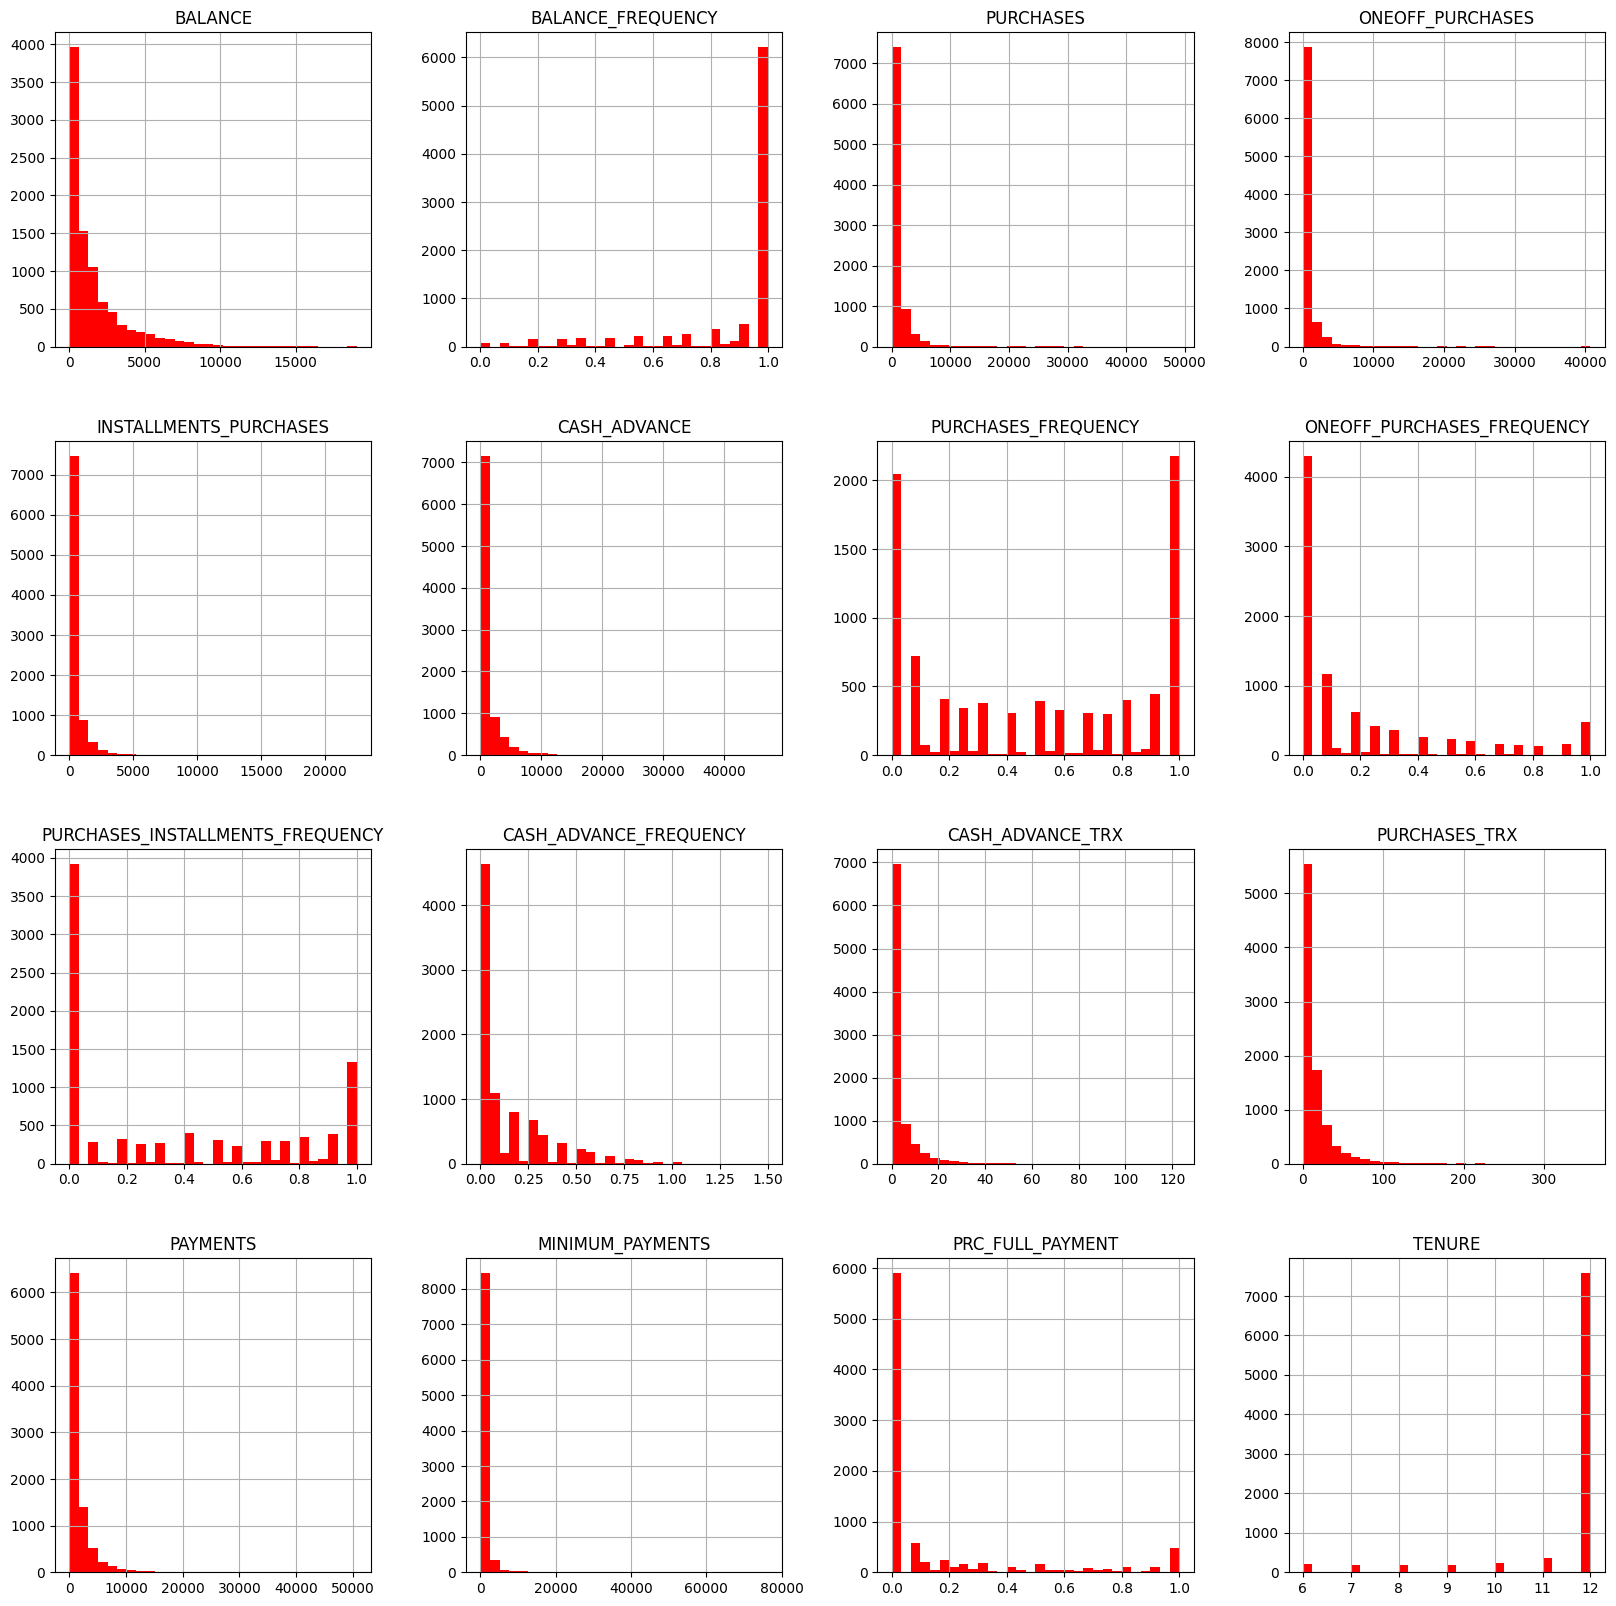

In [16]:
df.hist(bins = 30,figsize=(20,20), color = 'r');

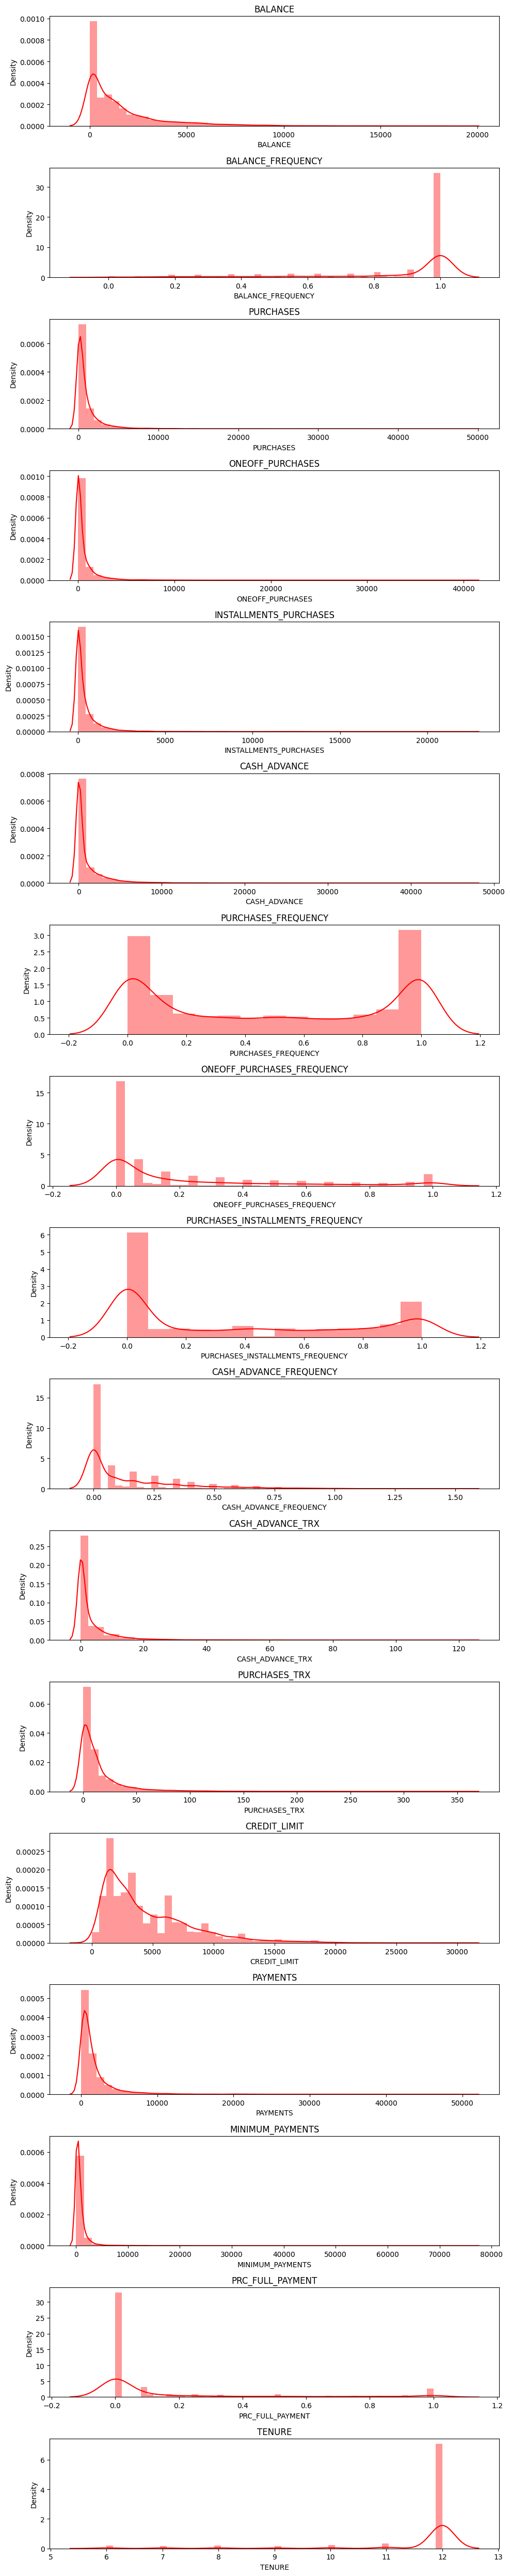

In [17]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(df[df.columns[i]], kde=True, color='r')
    plt.title(df.columns[i])
plt.tight_layout()

In [18]:
correlations = df.corr()

<Axes: >

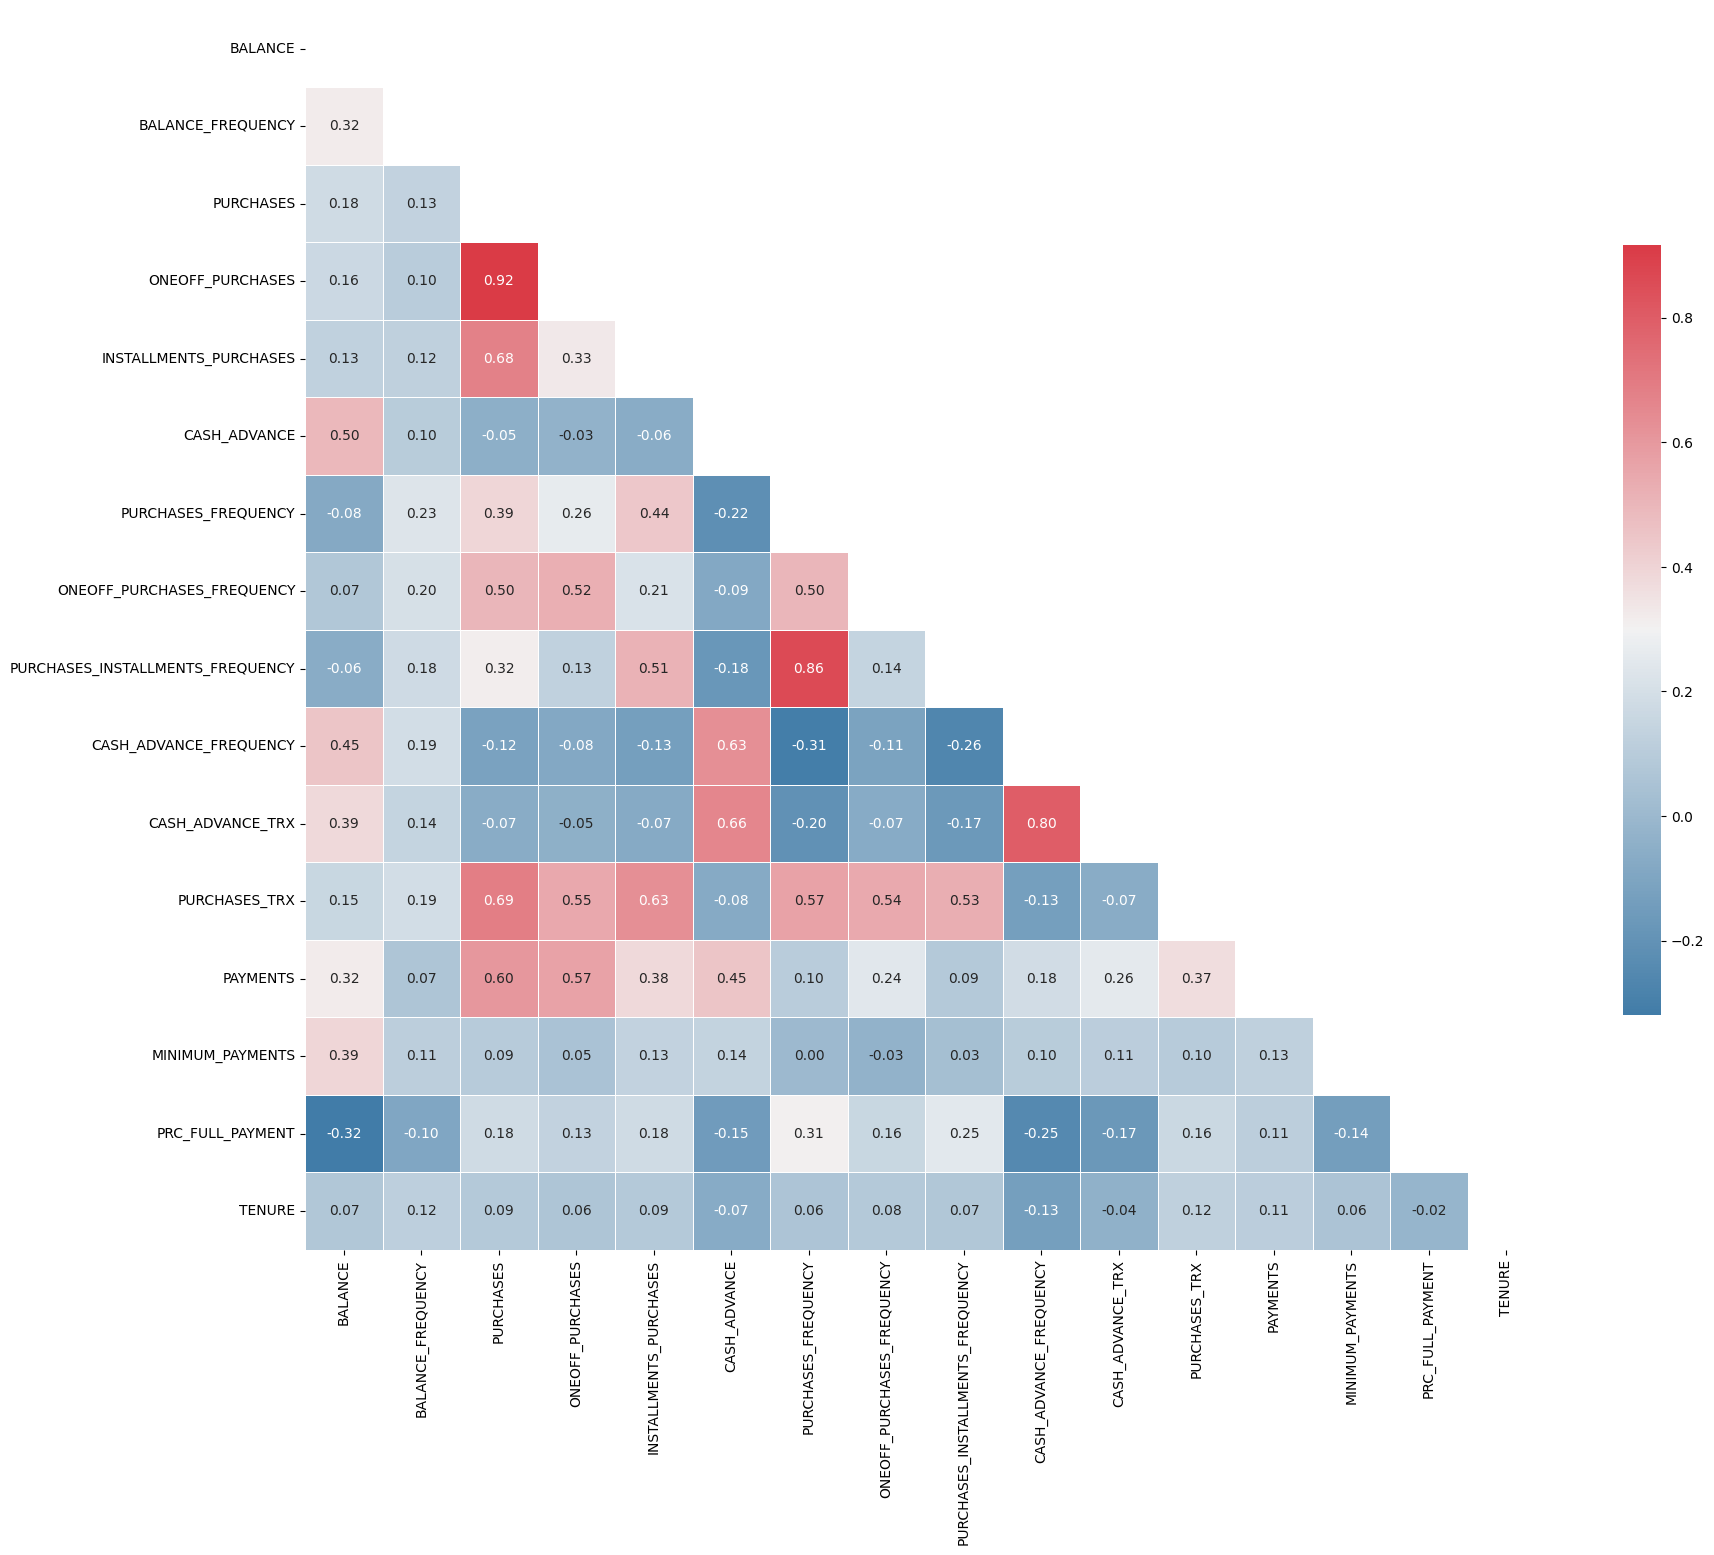

In [19]:
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.color_palette("magma", as_cmap=True)
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap=cmap, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Definindo número ótimo de clusters usando Elbow Method

In [20]:
min(df['BALANCE']),max(df['BALANCE'])

(0.0, 19043.13856)

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [22]:
min(df_scaled[0]),max(df_scaled[0])

(-0.9602134822129269, 0.36067954425377496)

In [23]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [24]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss_1.append(kmeans.inertia_)

In [25]:
wcss_1

[152149.99999999988,
 127784.78983483612,
 111986.25001580192,
 99073.47747211694,
 91502.38699774709,
 84851.04969655856,
 79531.39297981579,
 74623.3180599754,
 69953.92413175425,
 66484.4232647705,
 63636.61422587424,
 61373.68586249949,
 59173.761240162465,
 57497.29191371948,
 55844.55900007846,
 54597.119393679706,
 53195.93791096422,
 51956.39431162835,
 50361.44843385692]

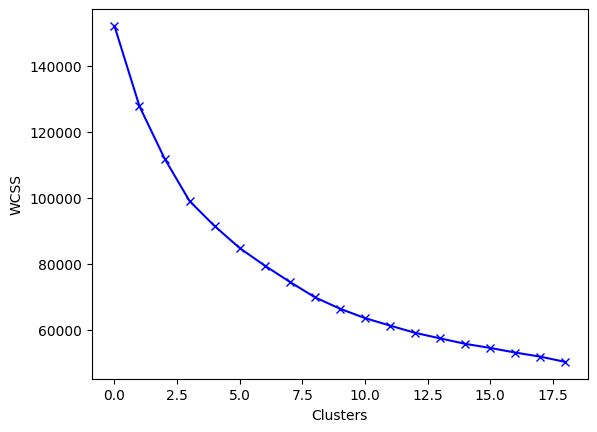

In [26]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com k-means

In [27]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [28]:
labels, len(labels)

(array([1, 0, 2, ..., 6, 6, 6], dtype=int32), 8950)

In [29]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 884, 2766, 1122,   23, 2015,  330,  626, 1184]))

In [30]:
kmeans.cluster_centers_

array([[ 1.67383058e+00,  3.95015479e-01, -2.20864993e-01,
        -1.57145252e-01, -2.33595709e-01,  1.99123376e+00,
        -4.80454545e-01, -2.12110076e-01, -4.20490445e-01,
         1.91041958e+00,  1.91425589e+00, -2.70172923e-01,
         1.01231953e+00,  7.97240457e-01,  5.46880589e-01,
        -3.95686550e-01,  7.24337929e-02],
       [ 6.20978755e-03,  4.03802391e-01, -3.54578445e-01,
        -2.39116377e-01, -3.98987415e-01, -1.01261246e-01,
        -8.42030381e-01, -3.83517696e-01, -7.51709190e-01,
         9.19834058e-02, -3.65680208e-02, -4.77952605e-01,
        -3.06625363e-01, -2.52636848e-01, -1.32511605e-02,
        -4.55200877e-01,  2.73960665e-01],
       [-1.22054391e-01,  4.02869442e-01,  5.64666623e-01,
         6.84277885e-01,  7.78044770e-02, -3.32336019e-01,
         9.98305249e-01,  1.91328054e+00,  2.15068395e-01,
        -4.17739257e-01, -3.33589805e-01,  6.59110602e-01,
         4.64696061e-01,  1.63076661e-01, -1.56033202e-01,
         4.59606179e-01,  2.7

In [31]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.673831,0.395015,-0.220865,-0.157145,-0.233596,1.991234,-0.480455,-0.212110,-0.420490,1.910420,1.914256,-0.270173,1.012320,0.797240,0.546881,-0.395687,0.072434
1,0.006210,0.403802,-0.354578,-0.239116,-0.398987,-0.101261,-0.842030,-0.383518,-0.751709,0.091983,-0.036568,-0.477953,-0.306625,-0.252637,-0.013251,-0.455201,0.273961
2,-0.122054,0.402869,0.564667,0.684278,0.077804,-0.332336,0.998305,1.913281,0.215068,-0.417739,-0.333590,0.659111,0.464696,0.163077,-0.156033,0.459606,0.273946
3,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174065,8.991136,1.064817,1.236317,0.295702
4,-0.358012,0.332525,-0.029541,-0.240512,0.371817,-0.361514,0.996780,-0.380548,1.207781,-0.471384,-0.359030,0.195019,-0.259585,-0.212570,-0.029867,0.313075,0.255466
5,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337673,1.532138,0.601452,0.259664,0.335772
6,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.563996,-0.391666,-0.208921,0.012748,-3.197669
7,-0.700790,-2.139036,-0.309765,-0.234317,-0.301838,-0.320500,-0.553180,-0.440811,-0.438653,-0.521542,-0.376440,-0.418196,-0.173155,-0.191789,-0.256737,0.287615,0.202901


Cluster 0 - Os Endividados Cautelosos
Comportamento: Este cluster parece estar endividado (saldo alto e alto cash advance) mas cauteloso com suas compras (baixa frequência e valores baixos de compras).
Insight: Podem ser alvos para programas de reestruturação de dívidas ou aconselhamento financeiro. Oferecer produtos de baixo custo e serviços que ajudam na gestão de dívidas pode ser eficaz
.
Cluster 1 - Os Planejadores de Parcelamento
Comportamento: Os clientes têm um saldo alto, realizam compras moderadas, principalmente parceladas, e têm um alto pagamento mínimo, indicando possíveis grandes saldos rotativos.
Insight: Pode ser vantajoso oferecer opções de refinanciamento ou transferência de saldo. Eles podem ser receptivos a termos de pagamento flexíveis ou benefícios por pagamentos pontu
ais.
Cluster 2 - Os Compradores Consistentes
Comportamento: Este grupo tem uma consistência nas suas compras e saldos, indicando um uso regular e consciente do cartão de crédito.
Insight: São bons candidatos para programas de recompensas baseados em pontos ou cashback, que incentivam o uso contínuo do
cartão.
Cluster 3 - Os Cautelosos com Crédito
Comportamento: Eles mantêm saldos médios e usam o cartão de crédito de forma conservadora, com baixo número de transações e compras.
Insight: Podem estar utilizando o cartão de crédito como uma reserva ou para compras específicas. Ofertas que aumentem a perceção de segurança e controle, como alertas de transações ou ferramentas de gestão financeira, podem ser
 atraentes.
Cluster 4 - Os Entusiastas de Compras
Comportamento: Este grupo gasta muito, especialmente em compras únicas, sugerindo aquisições de alto valor e um estilo de vida luxuoso.
Insight: Eles podem ser o público-alvo ideal para cartões de crédito de alto nível, com benefícios exclusivos, como acesso a salas VIP de aeroportos ou parcerias com m
arcas de luxo.
Cluster 5 - Os Grandes Gastadores
Comportamento: Com o maior saldo e atividade de compra, eles parecem não ter restrições financeiras e se beneficiam de um alto percentual de pagamento integral.
Insight: São clientes premium que podem valorizar e poderiam pagar por serviços exclusivos ou personalizados. Ofertas de produtos de investimento ou pacotes de seguros premium também pod
em ser atrativos.
Cluster 6 - Os Usuários Moderados
Comportamento: Este grupo tem saldos baixos e atividade de compra moderada, mostrando um uso equilibrado do crédito.
Insight: Incentivos para aumentar a frequência de uso, como bônus por uso em determinadas categorias, podem impulsionar uma maior a
tividade de compras.
Cluster 7 - Os Buscadores de Cash Advance
Comportamento: Com alto saldo e uso predominante de cash advance, estes clientes podem estar utilizando o cartão para obter dinheiro rápido, possivelmente para lidar com dívidas ou despesas não planejadas.
Insight: Este é um grupo de risco que pode estar enfrentando dificuldades financeiras. Programas educativos sobre finanças ou serviços de consultoria financeira poderiam ser úteis, bem como oferecer produtos com taxas de juros mais baixas para adiantamento de dinheiro.

In [32]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5048.411890,0.970846,531.323371,331.608439,199.829943,5154.581328,0.297521,0.139181,0.197324,0.517439,16.312217,7.994344,8177.493830,4041.076858,2138.688685,0.037983,11.614253
1,1577.399976,0.972928,245.642520,195.553160,50.268275,766.521548,0.152403,0.088047,0.065689,0.153551,2.999277,2.829718,3378.223668,1001.784932,833.325272,0.020576,11.883948
2,1310.428916,0.972707,2209.623777,1728.198509,481.425268,281.946955,0.891019,0.773226,0.449911,0.051550,0.972321,31.092857,6184.845779,2205.234808,500.577748,0.288142,11.883929
3,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
4,819.302614,0.956043,940.090620,193.236564,747.296931,220.758646,0.890407,0.088933,0.844440,0.040815,0.798711,19.557263,3549.390284,1117.774244,794.602961,0.245284,11.859197
5,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
6,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2441.725240,599.308188,377.324957,0.157443,7.238019
7,105.839567,0.370553,341.387745,203.518742,138.119679,306.767500,0.268333,0.070955,0.190105,0.030778,0.679899,4.315034,3863.884666,1177.934816,265.892511,0.237837,11.788851


In [33]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster' : labels})], axis = 1)

In [34]:
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


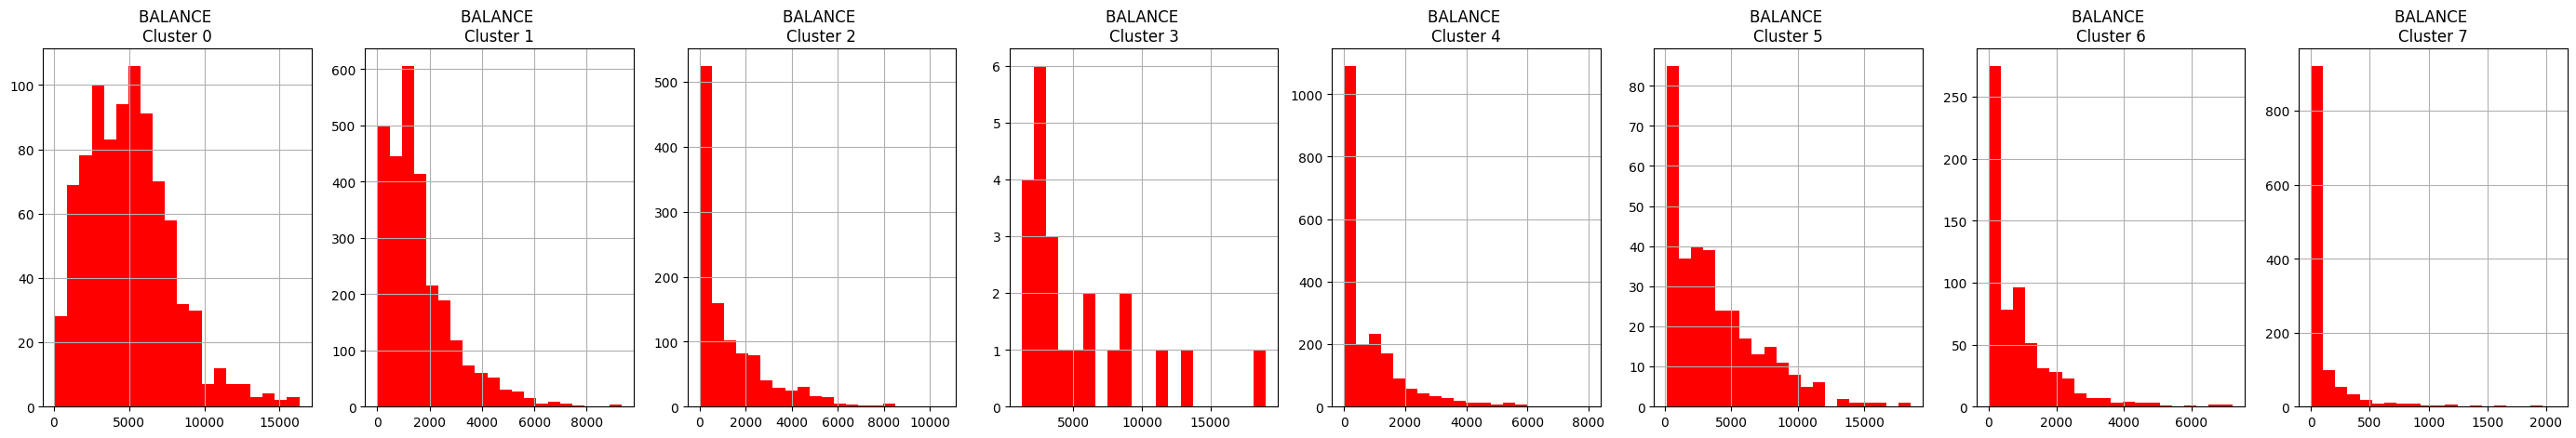

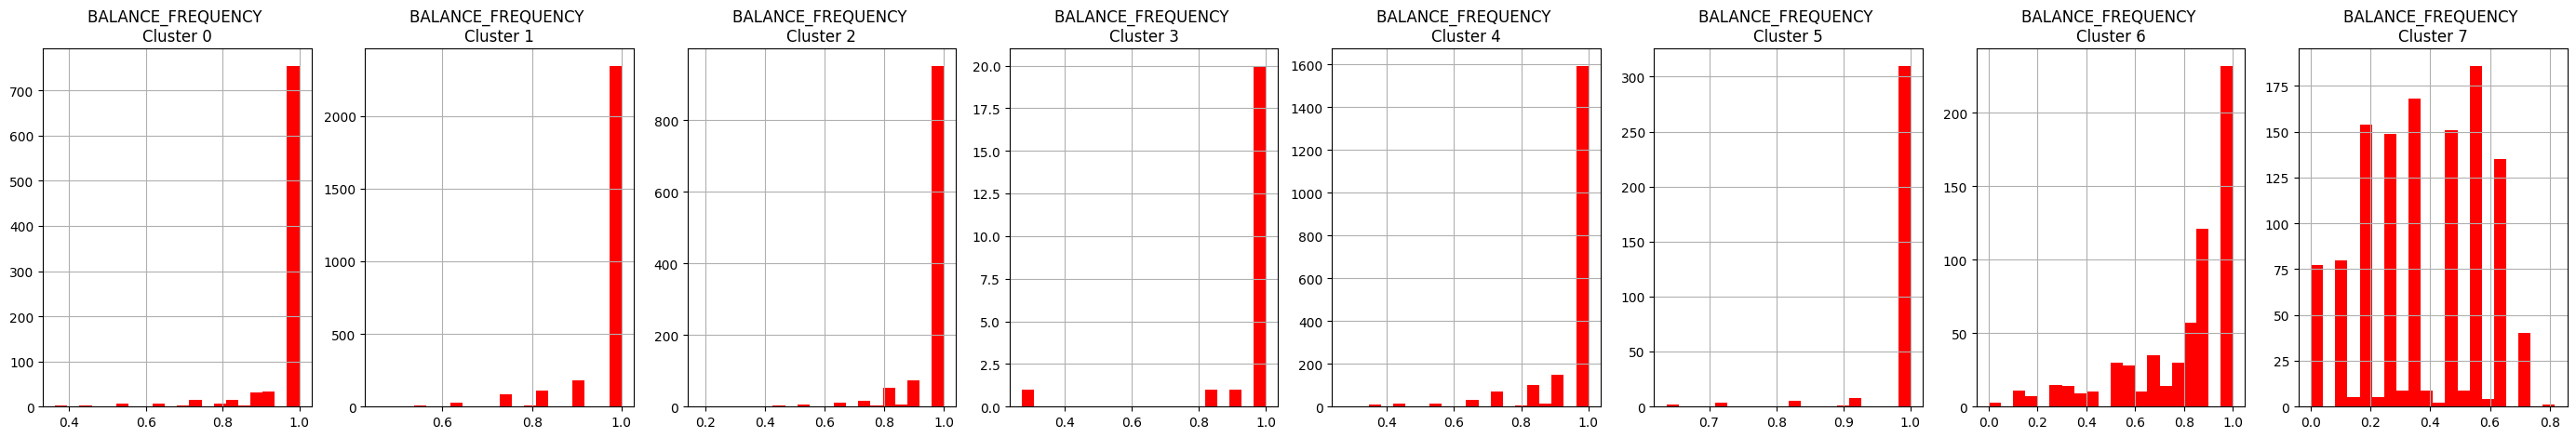

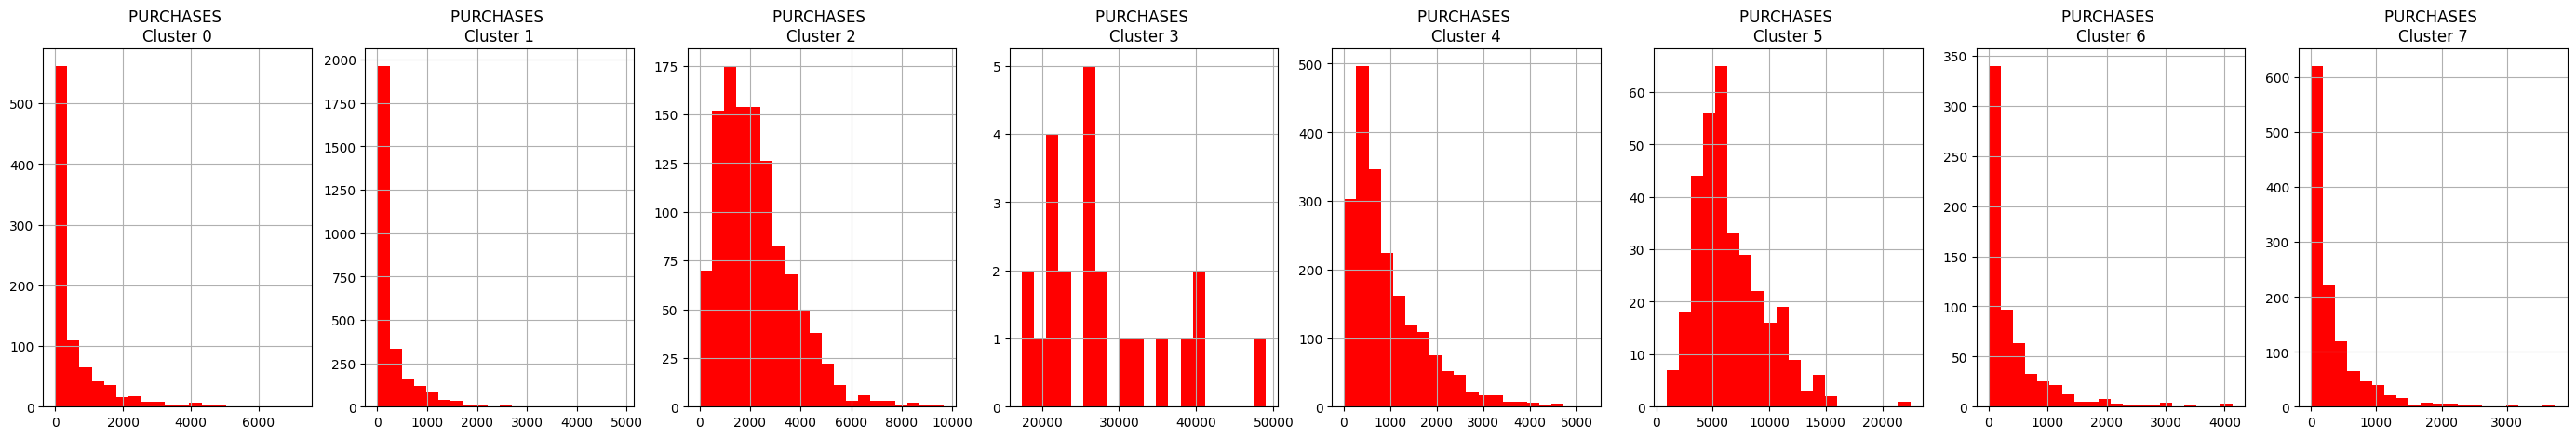

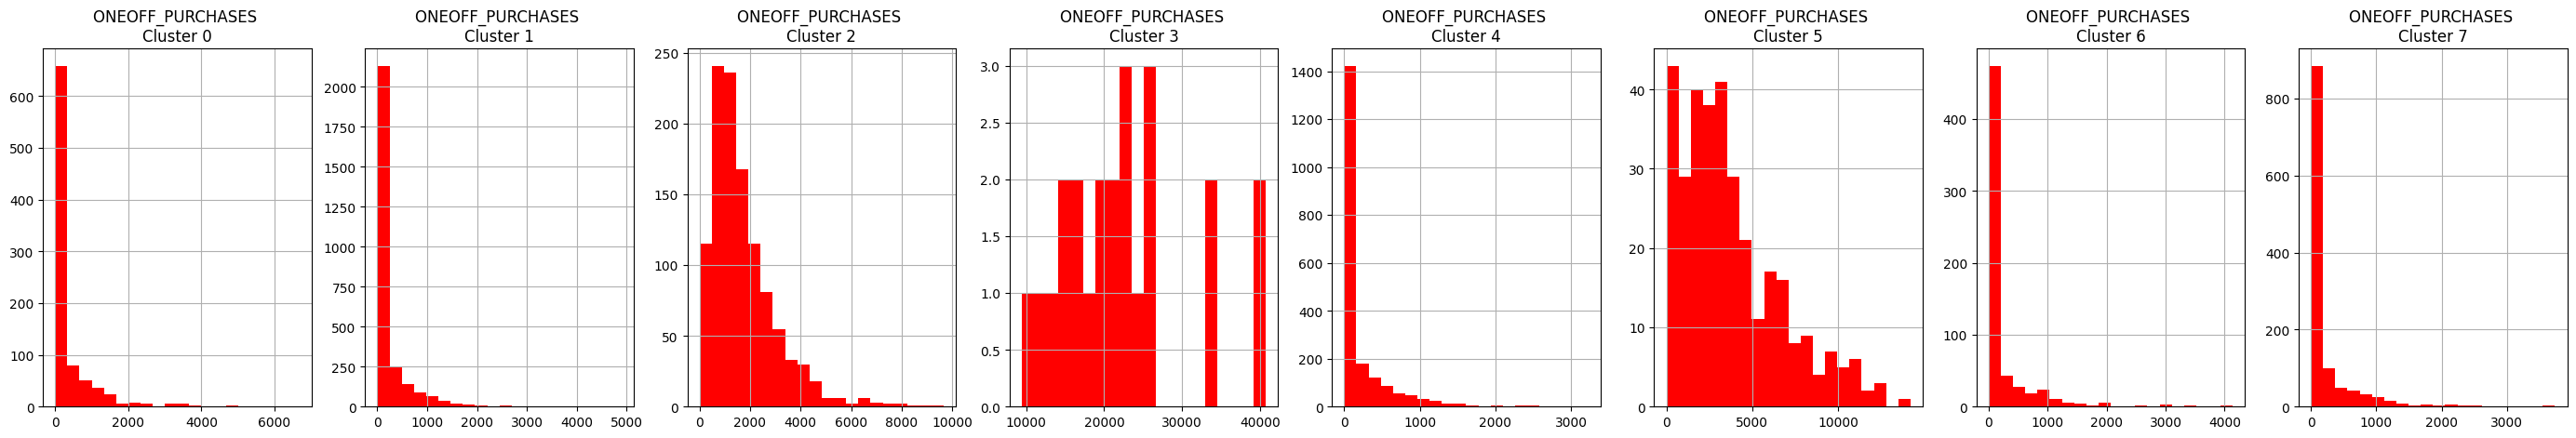

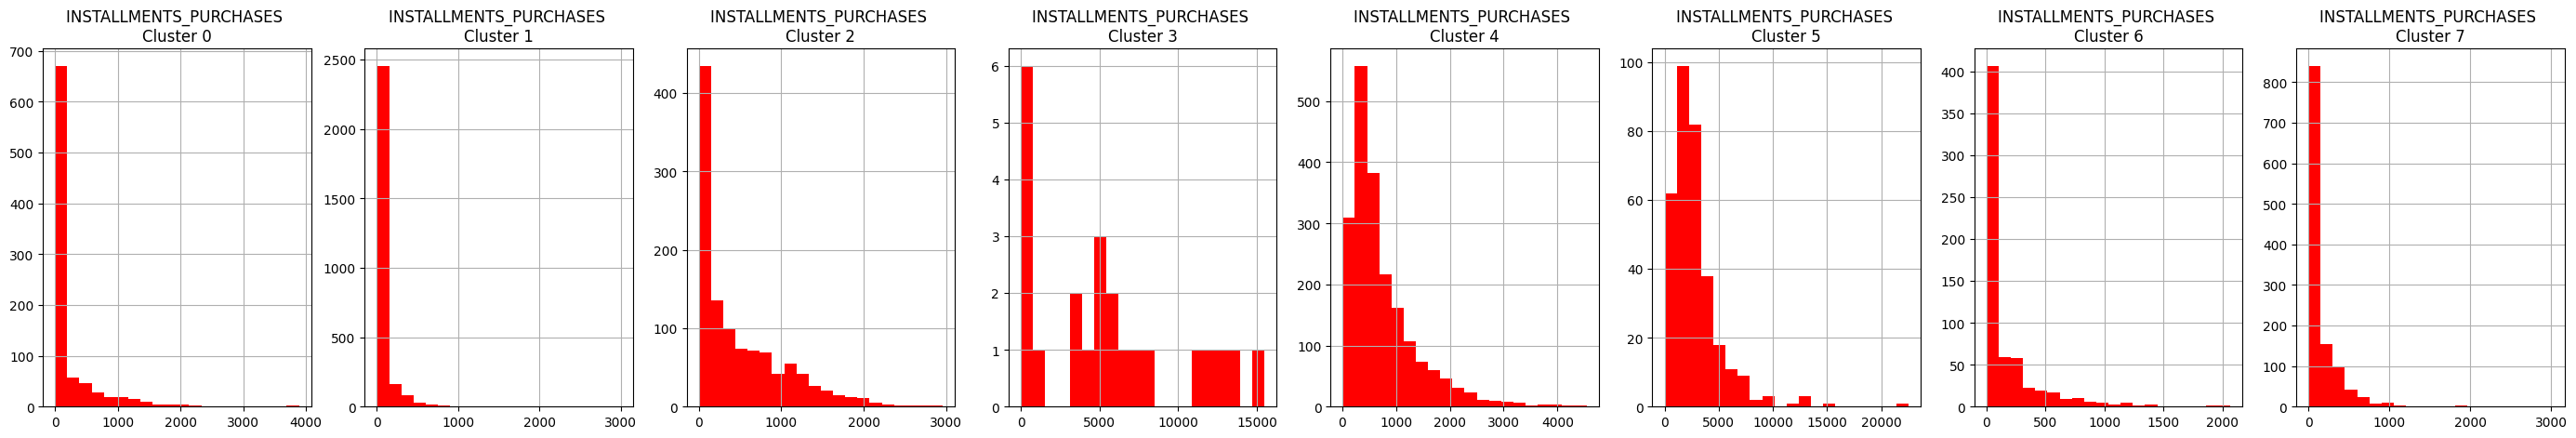

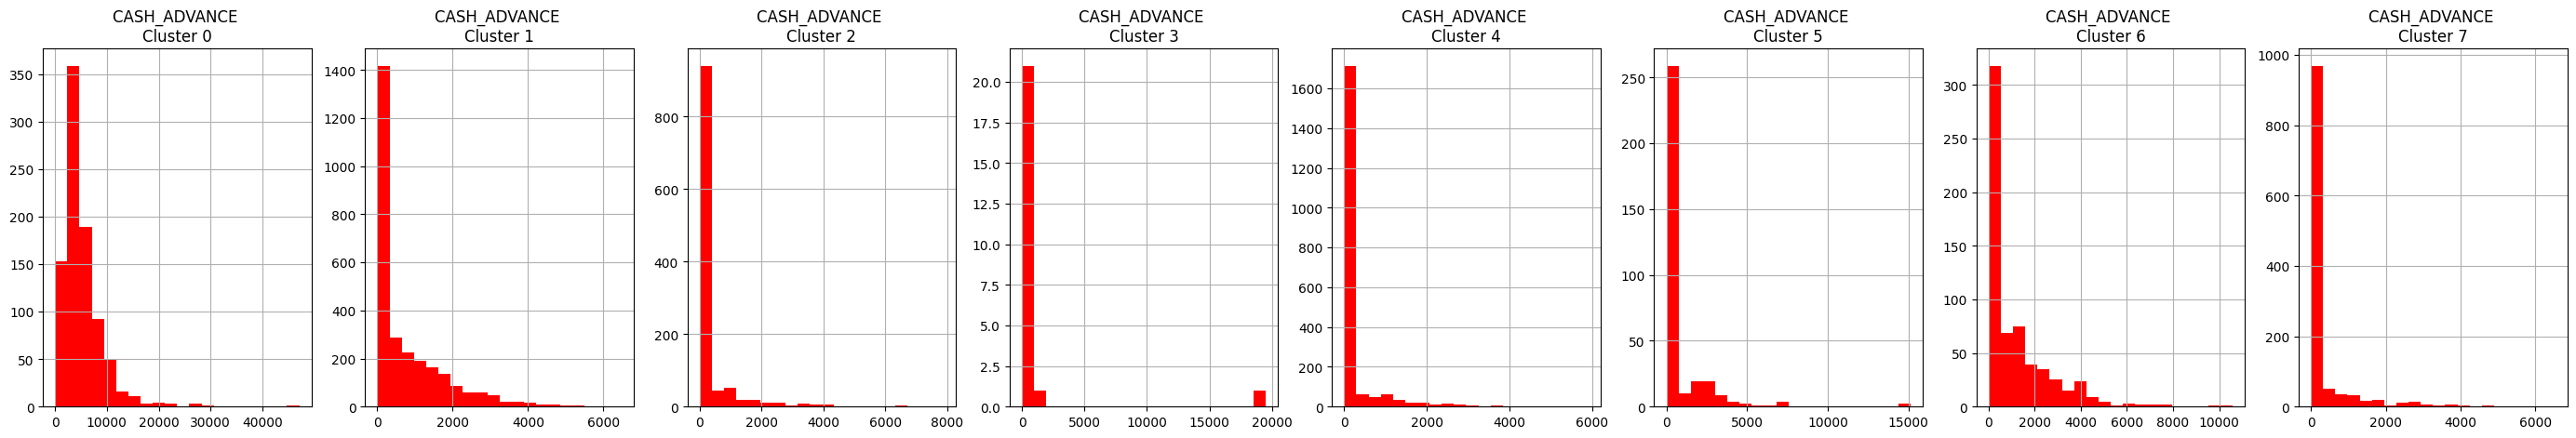

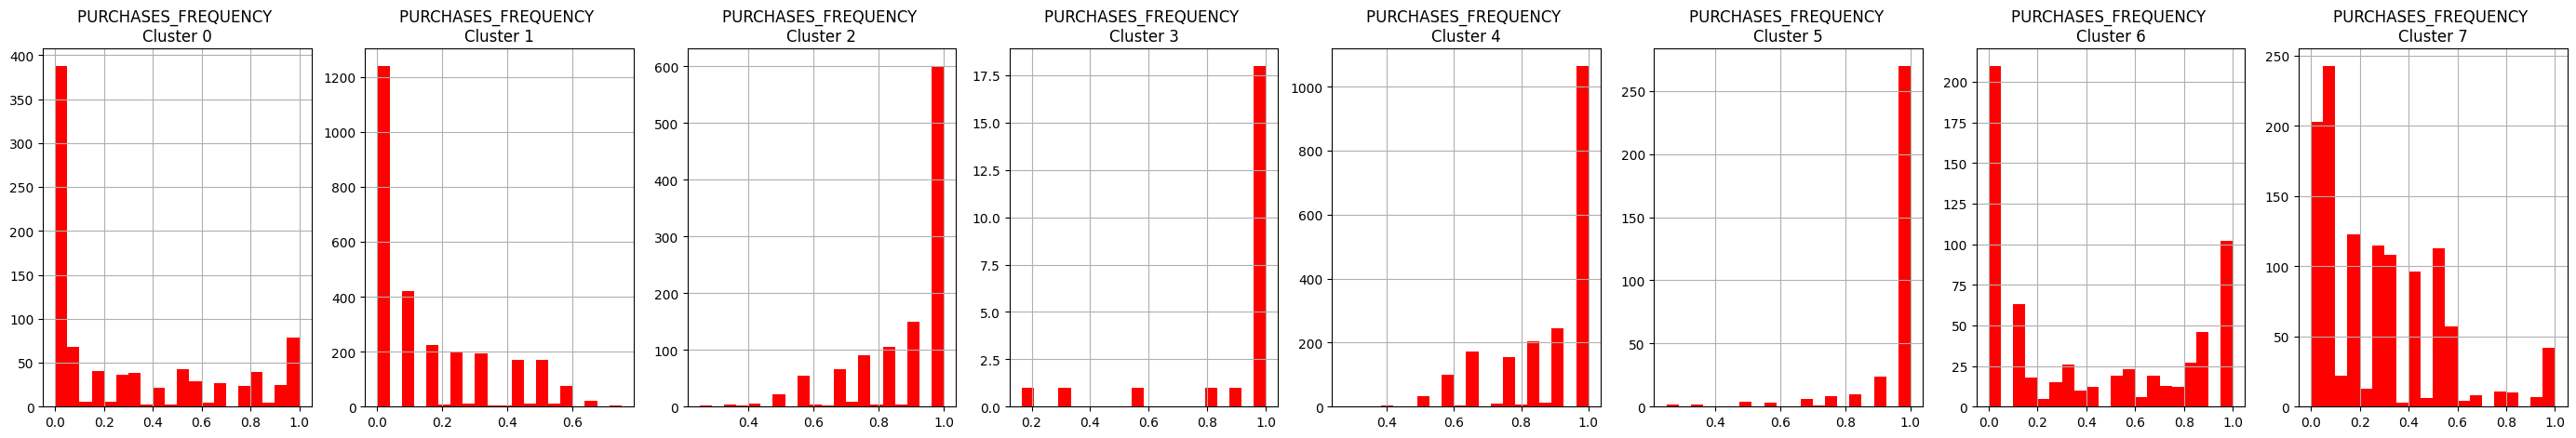

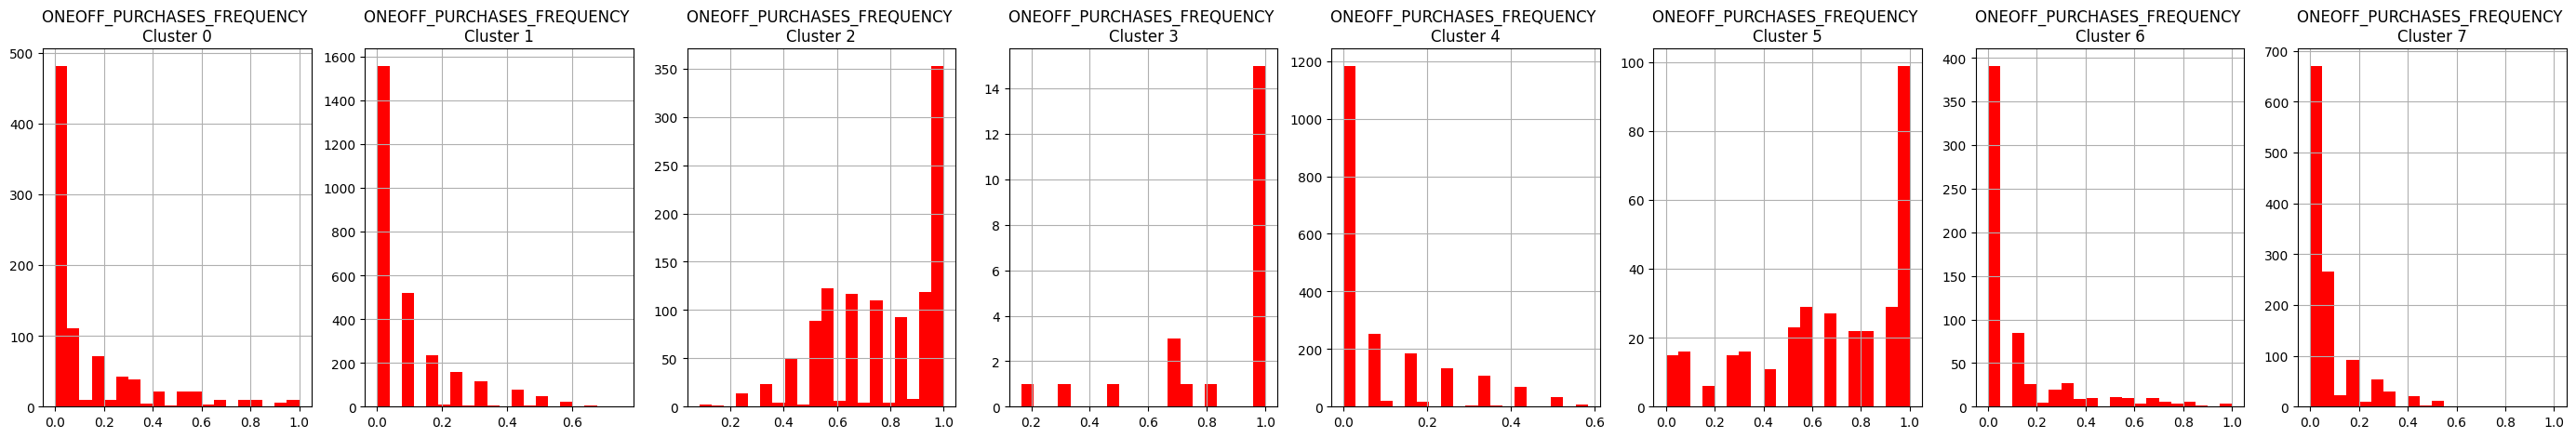

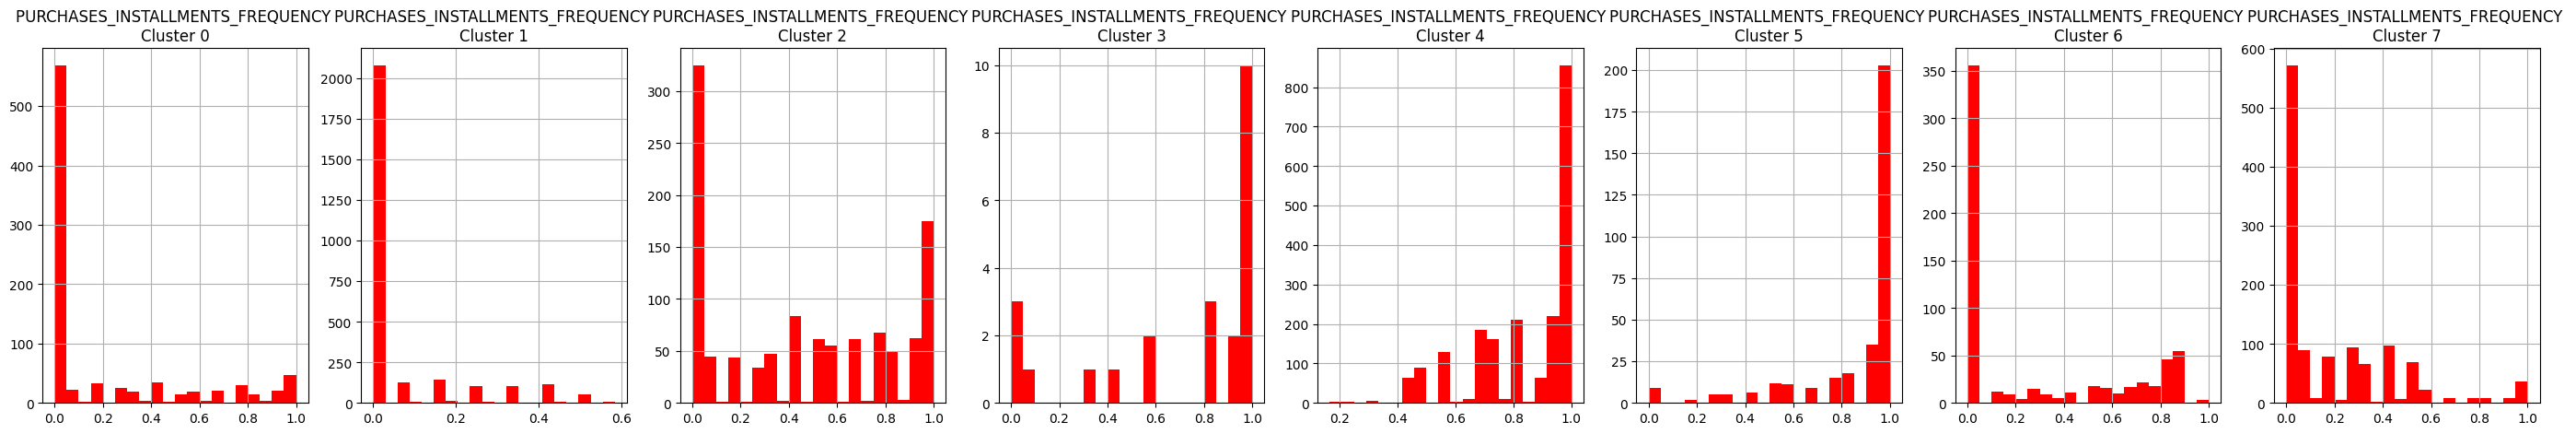

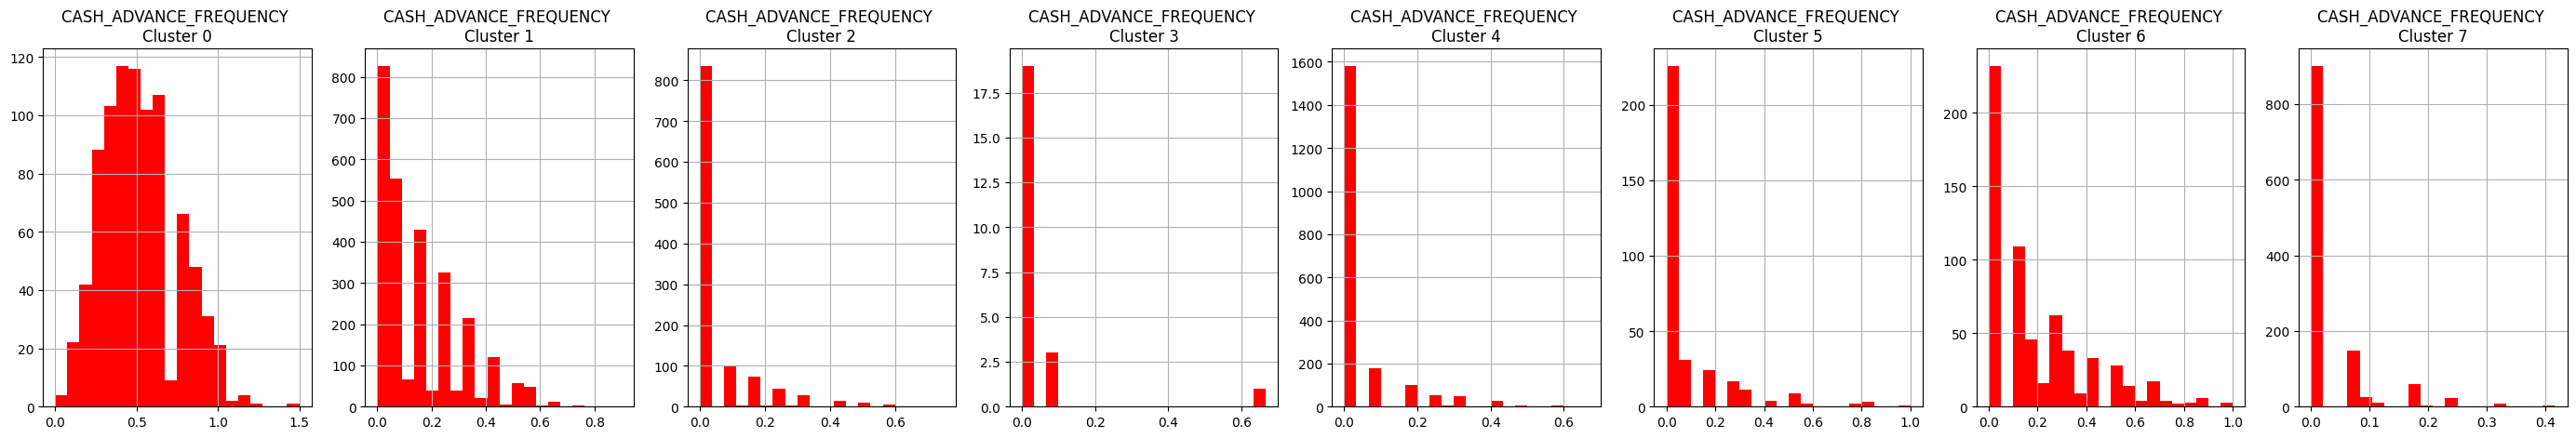

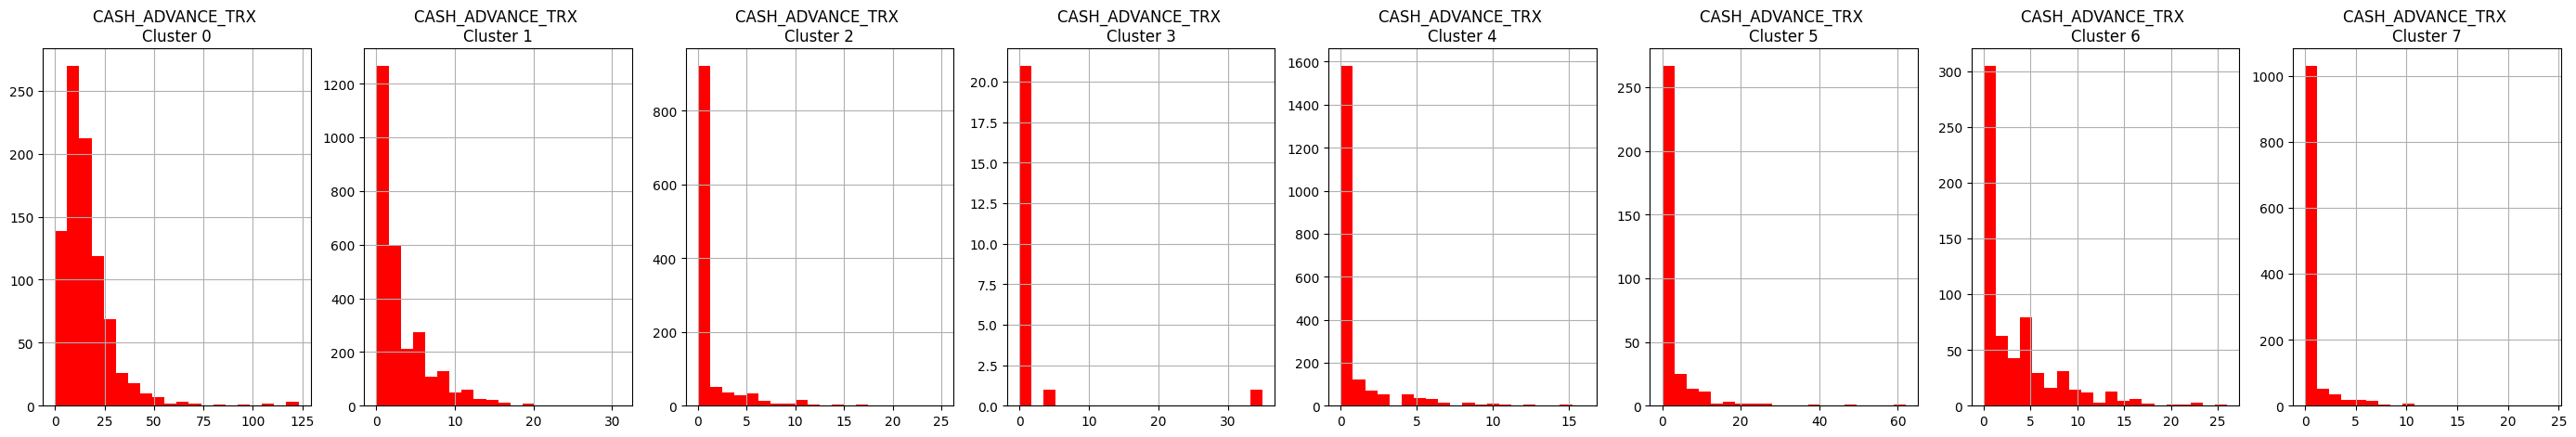

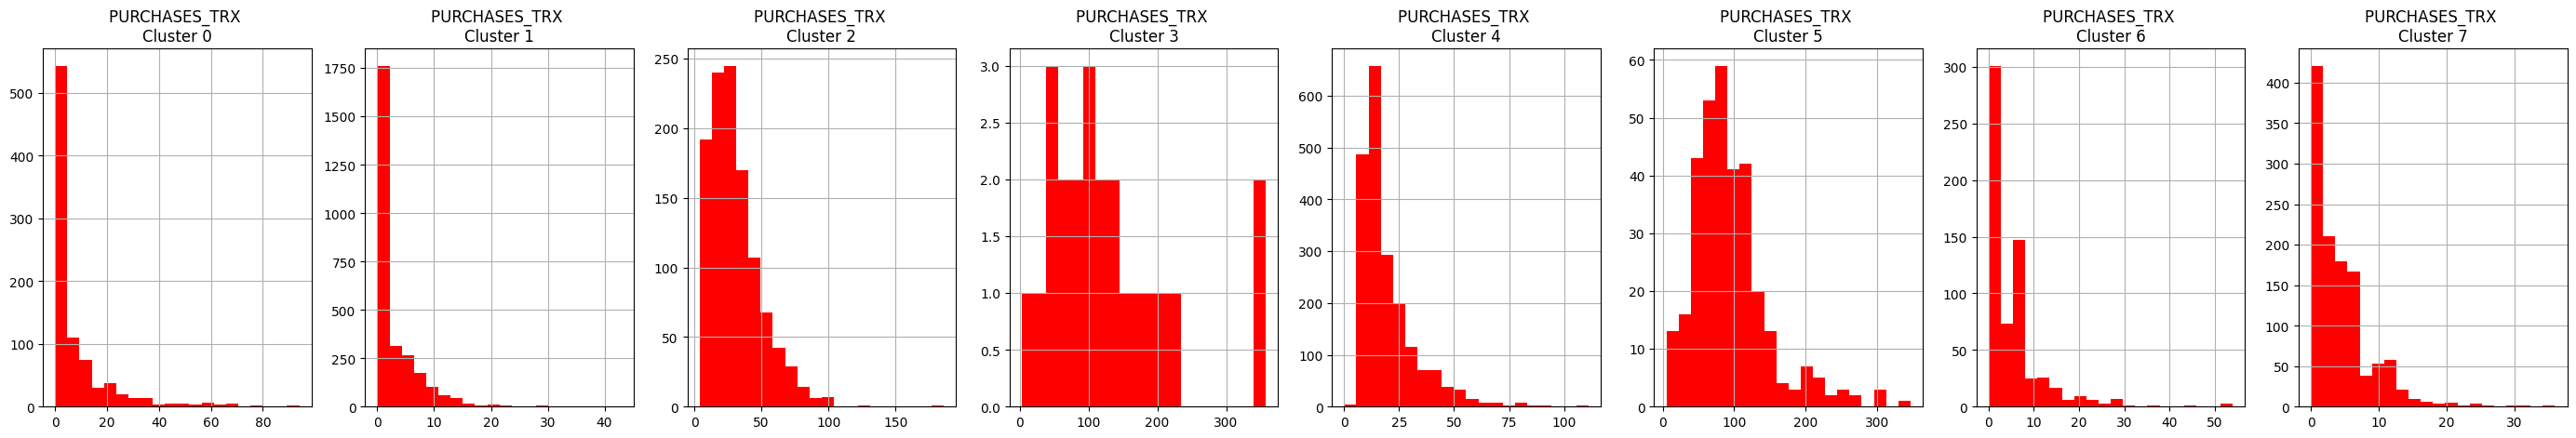

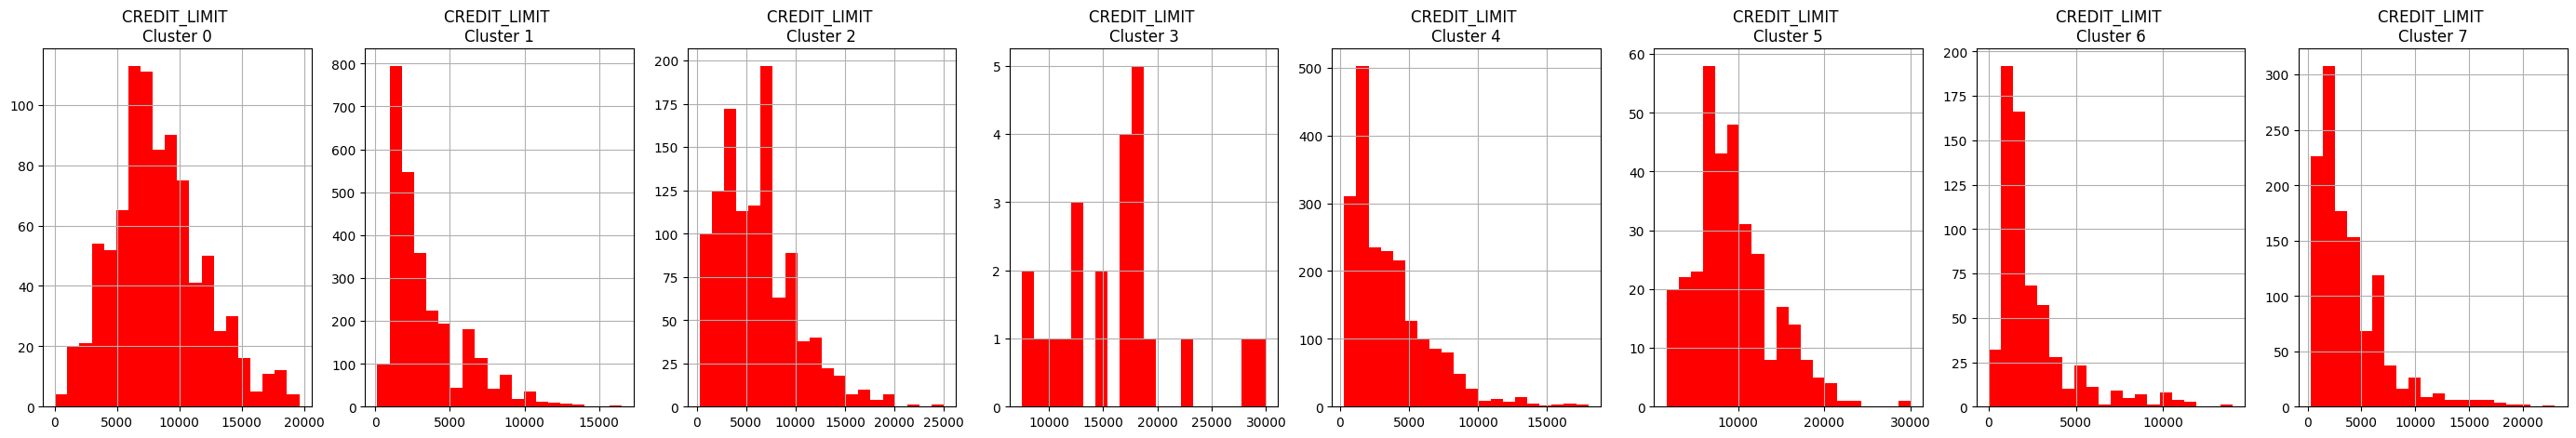

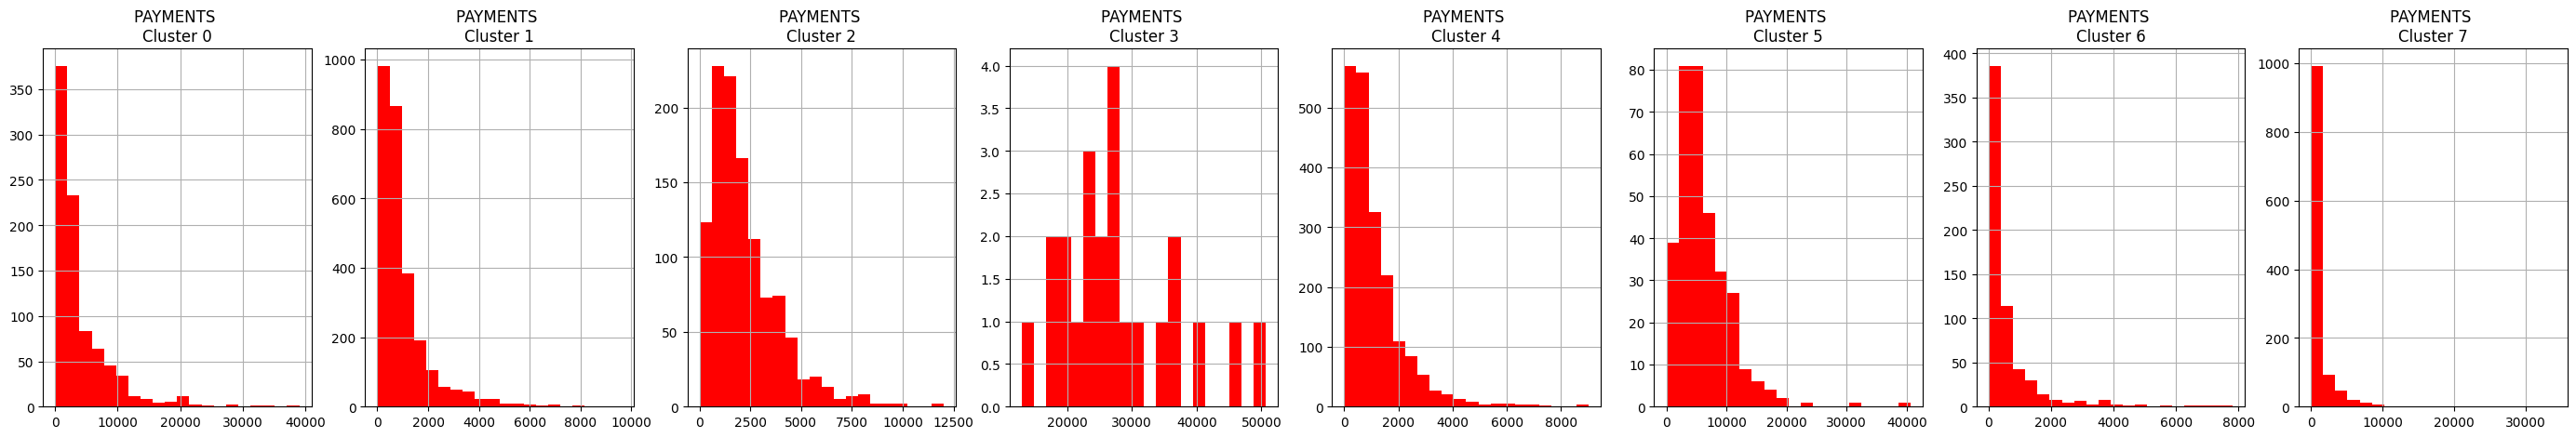

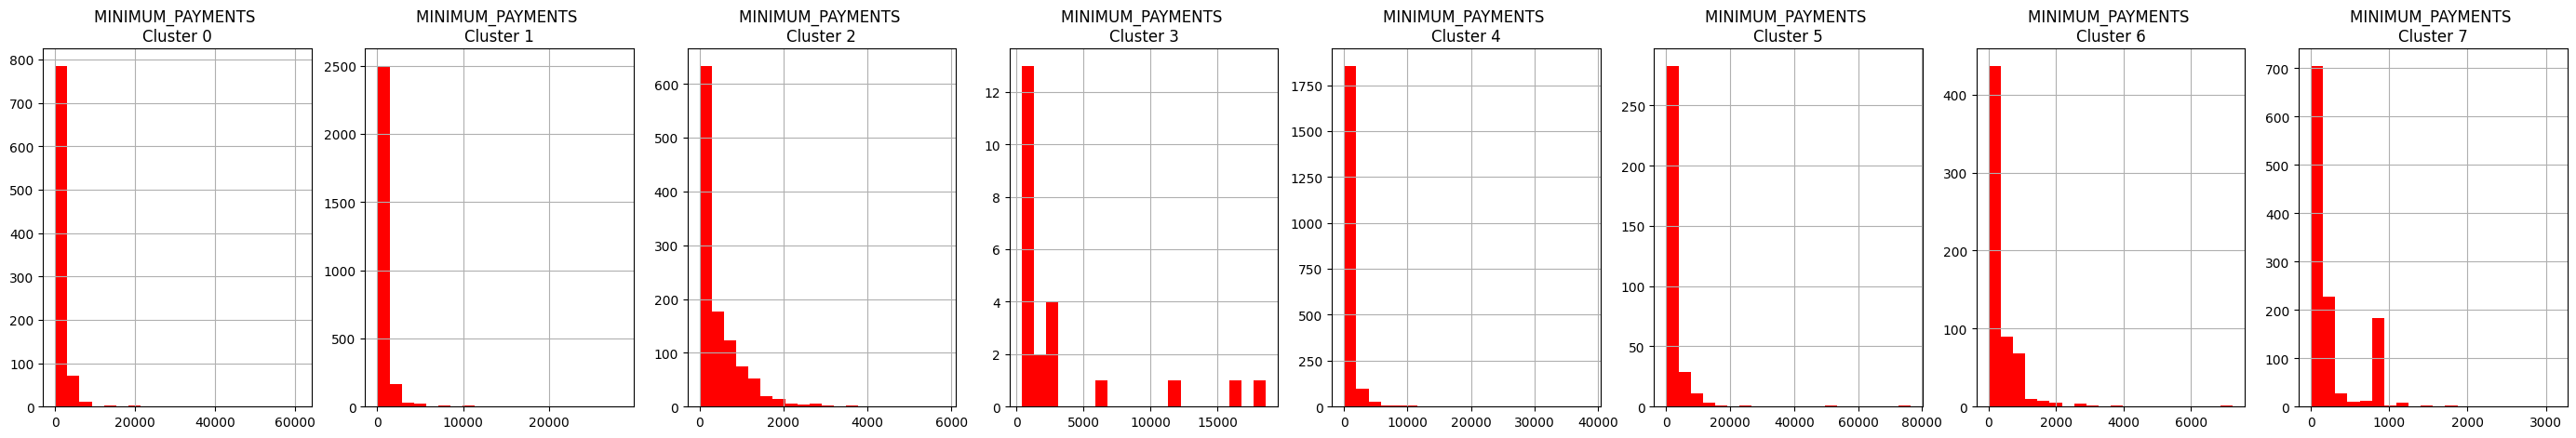

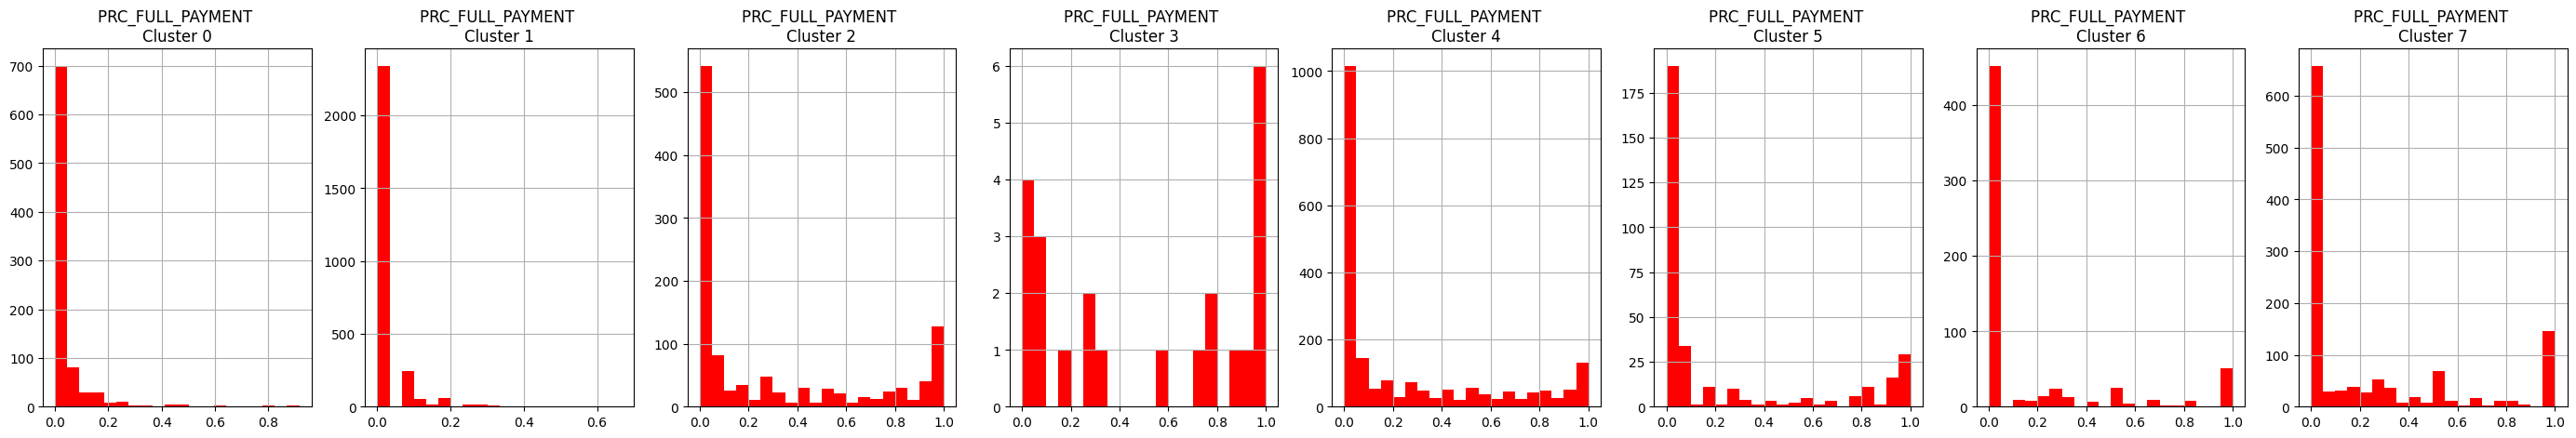

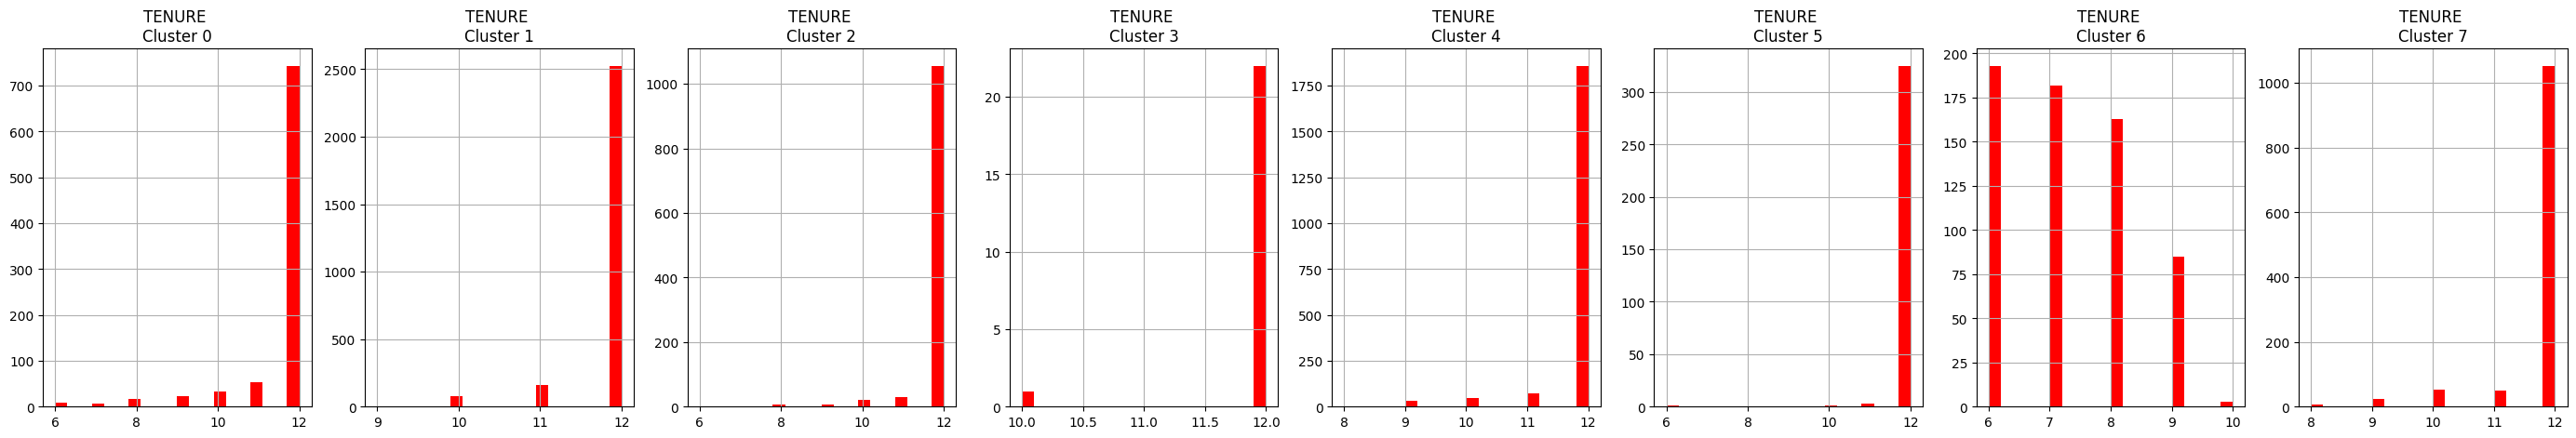

In [35]:
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range (8):
        plt.subplot(1, 8, j + 1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins =20, color = 'r')
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

In [36]:
df_ordered = df_cluster.sort_values(by= 'cluster')
df_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6726,2303.266119,1.0,740.73,324.88,415.85,3521.638805,0.583333,0.250000,0.333333,0.750000,14,9,5000.0,3241.098168,701.198898,0.0,12,0
4016,8695.084351,1.0,0.00,0.00,0.00,2772.592928,0.000000,0.000000,0.000000,0.083333,2,0,17500.0,2353.936879,2580.945270,0.0,12,0
6566,4661.423201,1.0,0.00,0.00,0.00,5263.831799,0.000000,0.000000,0.000000,0.583333,10,0,6500.0,2943.485063,1168.800699,0.0,12,0
909,7427.807223,1.0,205.89,110.00,95.89,3697.222827,0.416667,0.083333,0.416667,0.666667,11,12,9500.0,2404.231683,2364.114477,0.0,12,0
910,2746.923673,1.0,0.00,0.00,0.00,4289.506847,0.000000,0.000000,0.000000,0.333333,11,0,6500.0,2017.190799,622.503528,0.0,12,0


In [37]:
df_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6373,46.981185,0.454545,160.00,160.0,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,6500.0,204.116016,104.698965,0.000000,12,7
6363,27.857993,0.636364,352.23,0.0,352.23,0.0,0.500000,0.000000,0.416667,0.0,0,7,2500.0,299.490096,98.217199,0.272727,12,7
6356,6.395964,0.181818,79.00,79.0,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,7500.0,107.281393,45.447418,0.000000,12,7
6544,148.376249,0.363636,600.00,600.0,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,2500.0,731.400261,178.462119,0.000000,12,7
5876,26.960540,0.636364,157.45,0.0,157.45,0.0,0.416667,0.000000,0.416667,0.0,0,5,1000.0,238.253379,116.450584,0.000000,12,7


## Aplicação de PCA (Principal Component Analysis)

In [38]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68225914, -1.07627562],
       [-1.13808049,  2.50661528],
       [ 0.96975772, -0.38354785],
       ...,
       [-0.92642068, -1.81088121],
       [-2.3367176 , -0.65796556],
       [-0.5566113 , -0.40063264]])

In [39]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682259,-1.076276
1,-1.138080,2.506615
2,0.969758,-0.383548
3,-0.873557,0.043187
4,-1.599437,-0.688379


In [40]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682259,-1.076276,1
1,-1.138080,2.506615,0
2,0.969758,-0.383548,2
3,-0.873557,0.043187,1
4,-1.599437,-0.688379,1


<Axes: xlabel='pca1', ylabel='pca2'>

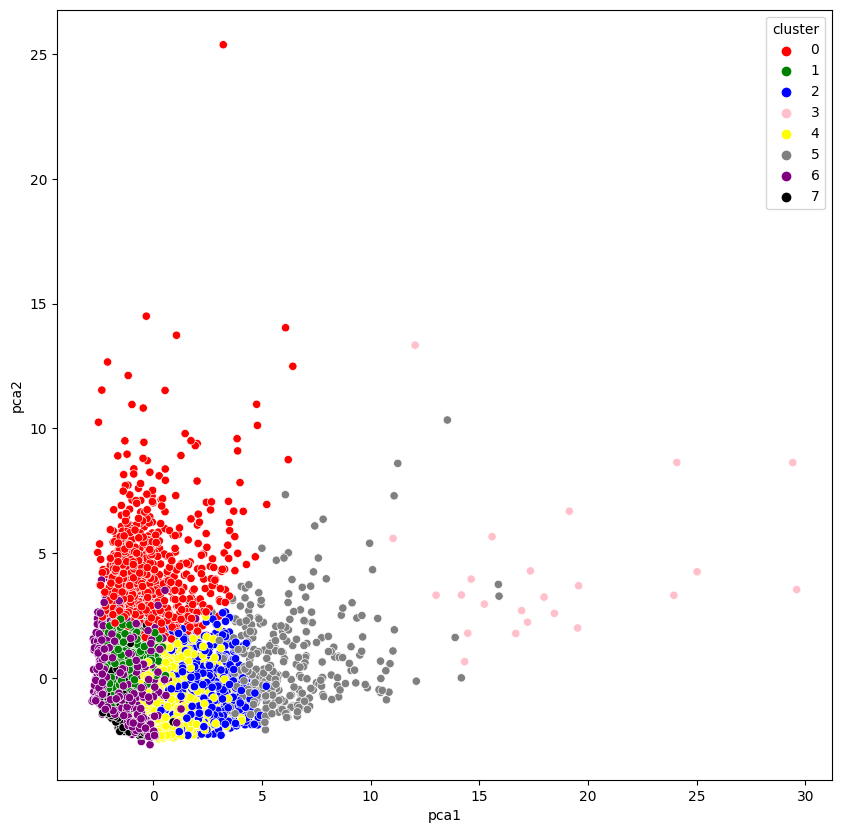

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow','grey','purple','black'])

Levando em consideração a utilização da técnica linear de redução de dimensionalidade PCA, que é uma técnica mais simples e menos flexível se comparada com Autoencoder, por exemplo, podemos extrair os seguintes insights:

Cluster 0 (Os Endividados Cautelosos): Majoritariamente localizados no canto inferior esquerdo do gráfico. A densidade e posicionamento deles sugerem um comportamento financeiro mais contido, alinhado com sua descrição. Para esse grupo, seria ideal focar em comunicações que promovam soluções de gestão de dívida.

Cluster 1 (Os Planejadores de Parcelamento): Concentrados no centro, onde a maioria dos dados está, e se estendem um pouco para o lado esquerdo e mais acima no eixo PCA2. Dado seu comportamento, seria eficaz oferecer opções de refinanciamento ou benefícios para pagamentos pontuais.

Cluster 2 (Os Compradores Consistentes): Este cluster tem sua maior concentração ao redor do centro, onde a maioria dos dados se localiza, indicando um uso equilibrado do crédito. Programas de recompensa ou cashback seriam atraentes para esse grupo.

Cluster 3 (Os Cautelosos com Crédito): Localizados em várias áreas do gráfico, mas com uma presença significativa no centro e à esquerda. A estratégia de marketing deve focar em ferramentas que proporcionem controle e segurança nas transCluster 4 (Os Entusiastas de Compras): Este cluster tem uma definição clara no gráfico, concentrando-se principalmente no canto inferior direito. Dada sua localização e descrição, eles são muito ativos em compras. Cartões de crédito de alto padrão e ofertas exclusivas seriam ideais para este grupo.ste grupo.

Cluster 5 (Os Grandes aEdescrição, este cluster pode ser representado pelos pontos que se destacam mais à direit de forma mais dispersaa no gráfico. Comunicações voltadas para exclusividade, serviços premium e personalizados seriam mais apropriadas para eles.

Cluster 6 (Os Usuários Moderados): Apresentam uma tendência de se concentrar mais ao centro, onde a maioria dos dados está,esquerdaouco à direita. Estratégias que incentivem um uso mais assíduo do cartão poderiam ser eficazes para este grupo.

Cluster 7 (Os Buscadores de Cash Advance): Possivelmente situados na parte superior do gráfico. Devido à sua inclinação a buscar adiantamentos em dinheiro, ofertas com taxas de juros mais baixas para esse tipo de transação e programas de educação financeira siam benéficos.

iam benéficas.

## Aplicação de autoencoders

In [42]:
df_scaled.shape

(8950, 17)

In [43]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [44]:
autoencoder = Model(input_df, decoded)

In [45]:
encoder = Model(input_df, encoded)

In [46]:
autoencoder.compile(optimizer ='Adam',loss='mean_squared_error')

In [47]:
autoencoder.fit(df_scaled,df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 11s 33ms/step - loss: 0.2006
Epoch 2/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0919
Epoch 3/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0632
Epoch 4/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0605
Epoch 5/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0557
Epoch 6/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0570
Epoch 7/50
280/280 [==============================] - 10s 34ms/step - loss: 0.0371
Epoch 8/50
280/280 [==============================] - 10s 35ms/step - loss: 0.0429
Epoch 9/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0323
Epoch 10/50
280/280 [==============================] - 10s 36ms/step - loss: 0.0718
Epoch 11/50
280/280 [==============================] - 10s 36ms/step - loss: 0.0403
Epoch 12/50
280/280 [==============================] - 10s 34ms/step - loss: 0.0315
Epoch 1

In [48]:
df_scaled.shape

(8950, 17)

In [49]:
compact = encoder.predict(df_scaled)

280/280 [==============================] - 1s 5ms/step


In [50]:
compact.shape

(8950, 10)

In [51]:
df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96021348, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [52]:
compact [0]

array([1.3318385 , 0.        , 0.44792897, 0.        , 1.0512817 ,
       0.27852646, 0.28866488, 0.28218585, 0.        , 0.3639785 ],
      dtype=float32)

In [53]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

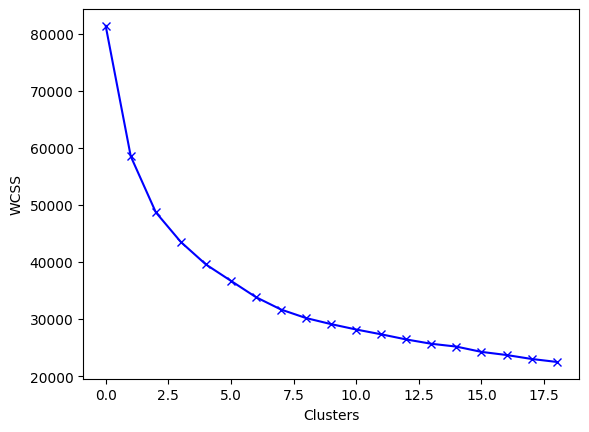

In [54]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [55]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [56]:
labels = kmeans.labels_
labels, labels.shape

(array([2, 0, 2, ..., 1, 1, 1], dtype=int32), (8950,))

In [57]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [58]:
df_cluster_auto = pd.concat([df, pd.DataFrame({'cluster' : labels})], axis = 1)
df_cluster_auto.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [59]:
df_cluster_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [60]:
df_cluster_auto['CREDIT_LIMIT'] = df_cluster_auto['CREDIT_LIMIT'].astype('float64')

In [61]:
grupos_media = df_cluster_auto.groupby('cluster').mean()
grupos_media

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,376.926874,0.481680,615.368986,348.645424,267.403015,616.728720,0.310390,0.094887,0.221517,0.058744,1.338893,6.247498,4001.608176,1537.864394,501.419179,0.229971,11.341561
1,3176.260733,0.895320,2161.982002,1412.174131,750.401525,2916.091518,0.548827,0.306394,0.391154,0.283051,8.350085,28.333049,6835.863146,3418.362289,1793.619512,0.157590,9.670358
2,1504.825696,0.968555,747.960278,405.496391,342.619950,639.028288,0.520403,0.205690,0.391696,0.124592,2.673148,13.500884,4085.636211,1288.754203,735.096940,0.133026,11.908244
3,6362.516970,0.946521,15991.138333,11081.453889,4909.684444,8078.807869,0.751315,0.556401,0.609632,0.256373,11.703704,92.759259,14300.000000,21727.852140,5607.474817,0.336781,11.500000


Com a nova de divisão de grupo usando autoencoder temos agora 4 clusters:
Cluster 0 - Os Utilizadores Equilibrados
Comportamento: Este cluster possui um saldo moderado e uma frequência de compras relativamente baixa, equilibrada entre compras únicas e parceladas. Eles recorrem ao cash advance com alguma frequência, mas não excessivamente. A participação em pagamentos integrais é baixa, sugerindo que eles não quitam o saldo total mensalmente.
Insight: Oferecer educação financeira e incentivar o uso responsável do cartão pode ser benéfico. Pode-se também incentivar um aumento gradual nas compras com programas de recompensas que promovam um maior envolvimento.

Cluster 1 - Os Compradores Práticos
Comportamento: Clientes neste cluster parecem fazer uso ativo do seu cartão tanto para compras únicas quanto parceladas, mantendo um bom equilíbrio entre as duas. Eles têm um alto limite de crédito e fazem uso de cash advance, sugerindo que podem ser mais propensos a tomar decisões de compra impulsivas ou de necessidade imediata.
Insight: Produtos que oferecem pontos ou recompensas em compras parceladas e um bom programa de gestão de pontos podem ser atraentes, assim como serviços que ajudem na gestão de gastos imprevistos.

Cluster 2 - Os Super Compradores
Comportamento: Este grupo se destaca pelo uso intensivo do cartão de crédito, com o maior volume de compras e uma frequência muito alta de transações tanto únicas quanto parceladas. Eles mantêm saldos altos, mas também têm o maior índice de pagamento integral, sugerindo um alto poder aquisitivo.
Insight: Tendo em vista seu engajamento e poder de compra, seriam o alvo ideal para cartões premium com benefícios exclusivos e programas de fidelidade de alto nível. Serviços de concierge e experiências personalizadas podem ser particularmente atrativos.

Cluster 3 - Os Cautelosos com Capital
Comportamento: Mantêm um saldo razoável e parecem utilizar o cash advance com mais frequência que os outros clusters. Apesar de terem uma frequência de compras decente, a quantidade de transações é moderada, sugerindo uma abordagem prudente ao uso do crédito.
Insight: Este grupo pode se beneficiar de produtos que ofereçam taxas de juros mais baixas e custos de cash advance reduzidos. Iniciativas que promovam um planejamento financeiro melhor e ajudem na otimização do uso do crédito também seriam apropriadas.

In [62]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.359081,-0.344136
1,1.374603,-1.262426
2,-0.957825,0.787475
3,1.048861,-0.724513
4,-1.635489,-0.059311


In [63]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.359081,-0.344136,2
1,1.374603,-1.262426,0
2,-0.957825,0.787475,2
3,1.048861,-0.724513,0
4,-1.635489,-0.059311,2


<Axes: xlabel='pca1', ylabel='pca2'>

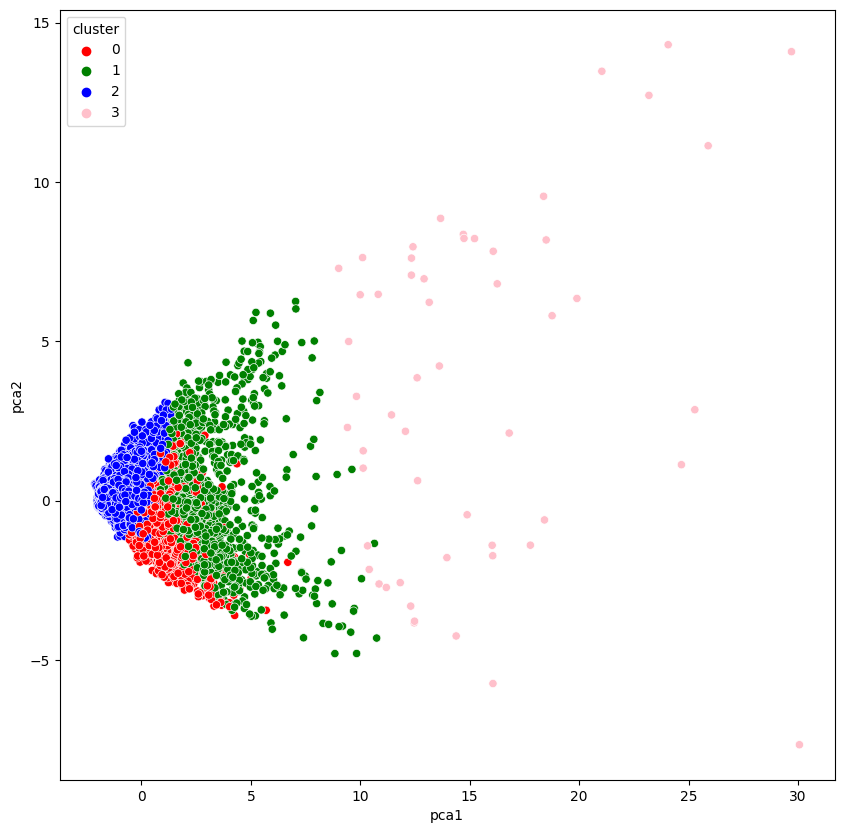

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [65]:
df_cluster_ordered = df_cluster_auto.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
7478,1271.172501,0.909091,0.00,0.00,0.00,1865.939841,0.000000,0.000000,0.00,0.090909,1,0,4000.0,2099.387435,366.383649,0.0,11,0
1074,42.125651,0.636364,453.89,453.89,0.00,0.000000,0.250000,0.250000,0.00,0.000000,0,3,6500.0,793.296498,127.427088,1.0,12,0
1072,814.269404,0.875000,0.00,0.00,0.00,1175.358928,0.000000,0.000000,0.00,0.125000,1,0,1200.0,257.187514,205.446177,0.0,8,0
7698,130.678469,0.545455,1480.76,1480.76,0.00,0.000000,0.333333,0.333333,0.00,0.000000,0,19,1000.0,2441.727849,153.303679,1.0,12,0
6263,0.000000,0.000000,408.38,0.00,408.38,0.000000,0.833333,0.000000,0.75,0.000000,0,13,6000.0,535.013917,864.206542,0.0,12,0
